# **Digital Addiction: Analyzing the Dark Side of Social Media Interaction**

-------------

## **Objective**

The objective of this project is to analyze the various factors contributing to digital addiction among social media users, identify key influencers, and build a predictive model to assess addiction levels. Through comprehensive data analysis and visualization, we aim to provide insights and recommendations for mitigating the negative impacts of digital addiction.

## **Data Source**

You can access the dataset for bike prices using the following link: https://www.kaggle.com/datasets/muhammadroshaanriaz/time-wasters-on-social-media

## **Step 1 : Import Library**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## **Step 2 : Import Data**

In [5]:
# URL of the dataset
url = "C:/Users/manav/Desktop/dataset.csv"
df = pd.read_csv(url)

# Step 3: Display Dataset
df.head()

,Age,Gender,Location,Income,Debt,Profession,Platform,Total Time Spent (minute),Video Length,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,Productivity Loss,Satisfaction,Watch Reason,Self Control,Addiction Level,Current Activity
0,19,Male,Pakistan,64900,1,Cashier,TikTok,274,3,3,29,36,1,Afternoon,5,5,Boredom,7,3,At work
1,21,Other,India,81350,1,Labor/Worker,YouTube,56,29,6,19,31,1,Afternoon,6,4,Boredom,8,2,At work
2,22,Male,Philippines,44995,0,driver,Facebook,173,11,4,11,34,1,Afternoon,6,4,Procrastination,8,2,At home
3,30,Female,United States,41826,0,Labor/Worker,Instagram,140,23,2,12,22,1,Evening,5,5,Habit,7,3,At home
4,33,Female,Pakistan,71649,1,driver,YouTube,99,23,9,24,13,1,Evening,7,3,Entertainment,9,1,At home


### Note
The data from the original sources has already been modified in Excel and IBM Watson Studio, so no further modifications are needed in this notebook.

## **Step 3: Describe Data**

#The dataset contains information about social media users and various factors related to their interaction with social media platforms. Below is a detailed description of each field, including the data type and its meaning.

| Column                        | Data Type | Description                                                                                      |
|-------------------------------|-----------|--------------------------------------------------------------------------------------------------|
| **Age**                       | int       | The age of the user in years.                                                                    |
| **Gender**                    | category  | The gender of the user. Categories include 'Male', 'Female', and 'Other'.                        |
| **Location**                  | category  | The country where the user is located.                                                           |
| **Income**                    | float     | The annual income of the user in local currency.                                                 |
| **Debt**                      | int       | Indicates whether the user has debt (1 for yes, 0 for no).                                       |
| **Profession**                | category  | The users profession, such as 'Cashier', 'Labor/Worker', 'Driver', etc.                         |
| **Platform**                  | category  | The social media platform used by the user, such as 'TikTok', 'YouTube', 'Facebook', 'Instagram'.|
| **Total Time Spent (minute)** | int       | Total time spent on social media in minutes.                                                     |
| **Video Length**              | int       | Length of the video watched by the user in minutes.                                              |
| **Importance Score**          | int       | A score indicating the perceived importance of the video content (scale 1-10).                   |
| **Time Spent On Video**       | int       | Time spent watching the video in minutes.                                                        |
| **Number of Videos Watched**  | int       | Number of videos watched by the user.                                                            |
| **Scroll Rate**               | int       | The rate at which the user scrolls through content.                                              |
| **Frequency**                 | category  | The time of day when the user most frequently uses social media, such as 'Morning', 'Afternoon', 'Evening'.|
| **Productivity Loss**         | int       | A score indicating the perceived productivity loss due to social media use (scale 1-10).         |
| **Satisfaction**              | int       | A score indicating the users satisfaction with their social media experience (scale 1-10).      |
| **Watch Reason**              | category  | The primary reason for watching videos, such as 'Boredom', 'Procrastination', 'Habit', 'Entertainment'. |
| **Self Control**              | int       | A score indicating the users self-control over their social media usage (scale 1-10).           |
| **Addiction Level**           | int       | A score indicating the level of addiction to social media (scale 1-10).                          |
| **Current Activity**          | category  | The activity the user was engaged in while using social media, such as 'At work', 'At home'.     |

### Data Types

- **int**: Integer data type, used for fields that contain whole numbers.
- **float**: Floating-point data type, used for fields that contain numbers with decimals.
- **category**: Categorical data type, used for fields that contain discrete values representing different categories.

### Data Analysis Goals

- **Age**: Helps in understanding the age distribution of users and identifying age groups more prone to digital addiction.
- **Gender**: Allows for the analysis of addiction levels across different genders.
- **Location**: Provides geographic insights into digital addiction trends.
- **Income**: Helps correlate income levels with addiction.
- **Debt**: Indicates financial stress and its potential correlation with addiction.
- **Profession**: Shows the relationship between different professions and social media usage.
- **Platform**: Helps identify which platforms have higher addiction levels.
- **Total Time Spent (minute)**: Direct measure of how much time users are spending on social media.
- **Video Length**: Insights into the preferred length of content consumed.
- **Importance Score**: Understand the perceived value of the content.
- **Time Spent On Video**: Measure of engagement with video content.
- **Number of Videos Watched**: Indicates the volume of content consumption.
- **Scroll Rate**: Provides insight into user engagement and browsing behavior.
- **Frequency**: Shows the time of day with the highest social media usage.
- **Productivity Loss**: Helps understand the impact of social media on users productivity.
- **Satisfaction**: Gauges user satisfaction with their social media experience.
- **Watch Reason**: Identifies the primary motivators for using social media.
- **Self Control**: Measures users ability to control their social media usage.
- **Addiction Level**: The target variable indicating the severity of social media addiction.
- **Current Activity**: Provides context for social media usage patterns.



## **Step 4 : Data Preprocessing**

In [50]:
## Handle Missing Values
df = df.dropna()  # This will drop any rows with NaNs in the entire DataFrame
print("Initial shape of DataFrame after dropping NaNs:", df.shape)

## Encode Categorical Variables
label_encoders = {}
categorical_columns = ['Gender', 'Location', 'Profession', 'Platform', 'Watch Reason', 'Current Activity']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Check for any NaNs after encoding
print("NaN values in DataFrame after encoding:", df.isna().sum())




Initial shape of DataFrame after dropping NaNs: (1000, 20)
NaN values in DataFrame after encoding: Age                          0
Gender                       0
Location                     0
Income                       0
Debt                         0
Profession                   0
Platform                     0
Total Time Spent (minute)    0
Video Length                 0
Importance Score             0
Time Spent On Video          0
Number of Videos Watched     0
Scroll Rate                  0
Frequency                    0
Productivity Loss            0
Satisfaction                 0
Watch Reason                 0
Self Control                 0
Addiction Level              0
Current Activity             0
dtype: int64


In [51]:
# Verify that all features are numerical before scaling
print(X.dtypes)

Age                           int64
Gender                        int64
Location                      int64
Income                        int64
Debt                          int64
Profession                    int64
Platform                      int64
Total Time Spent (minute)     int64
Video Length                  int64
Importance Score              int64
Time Spent On Video           int64
Number of Videos Watched      int64
Scroll Rate                   int64
Frequency                    object
Productivity Loss             int64
Satisfaction                  int64
Watch Reason                  int64
Self Control                  int64
Current Activity              int64
dtype: object


 This code is essential for preprocessing categorical data, enabling machine learning algorithms to process these features by converting them into a numerical format. This step is crucial because most machine learning models require input features to be numeric.


## **Step 5 : Data Visualization**

C:\Users\manav\AppData\Local\Temp\ipykernel_8276\4139787469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Addiction Level', data=df, palette='Set2')  # Using a colorful palette


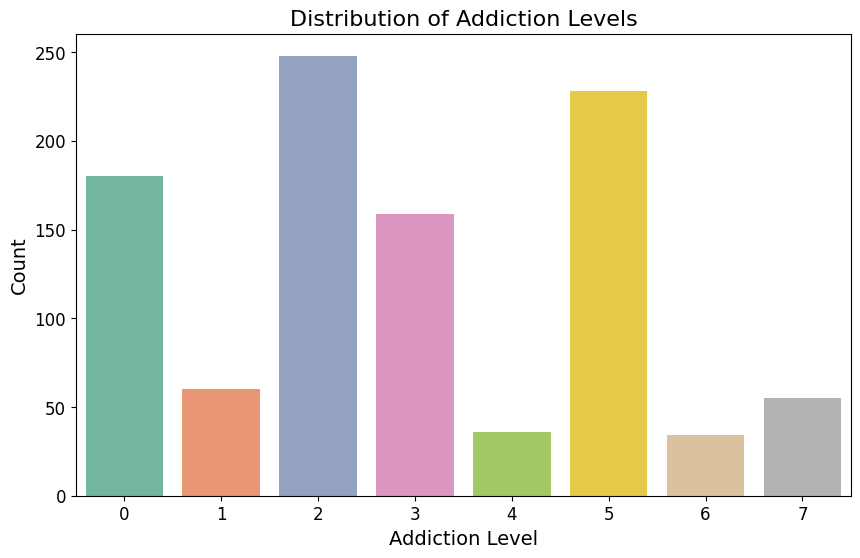

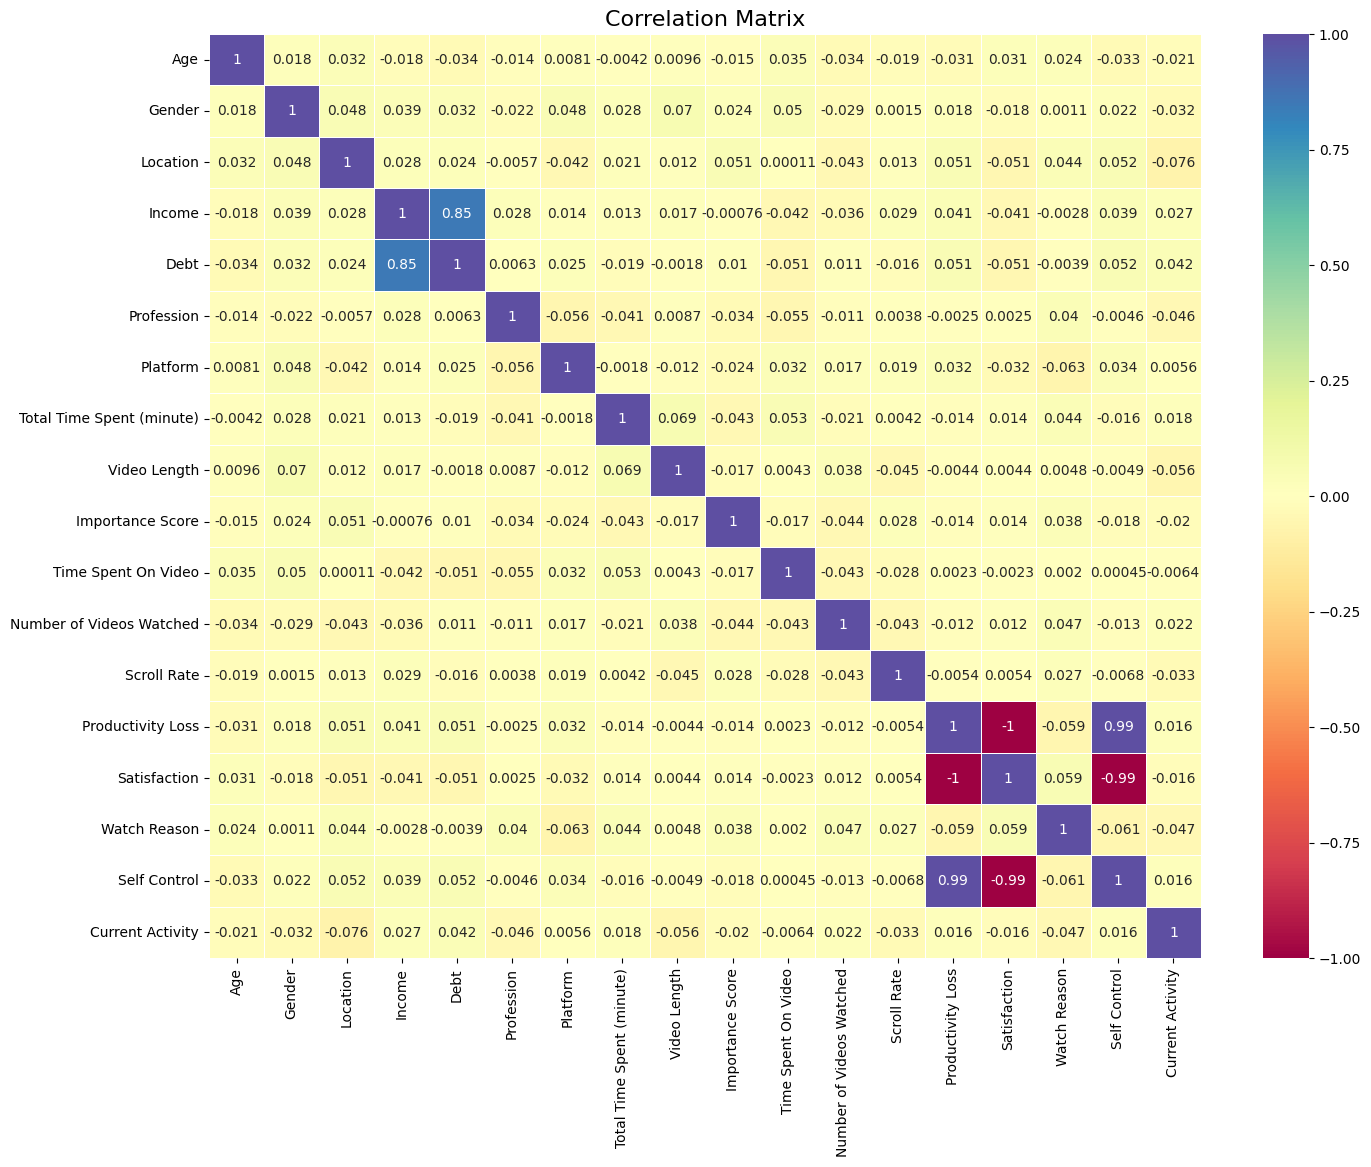

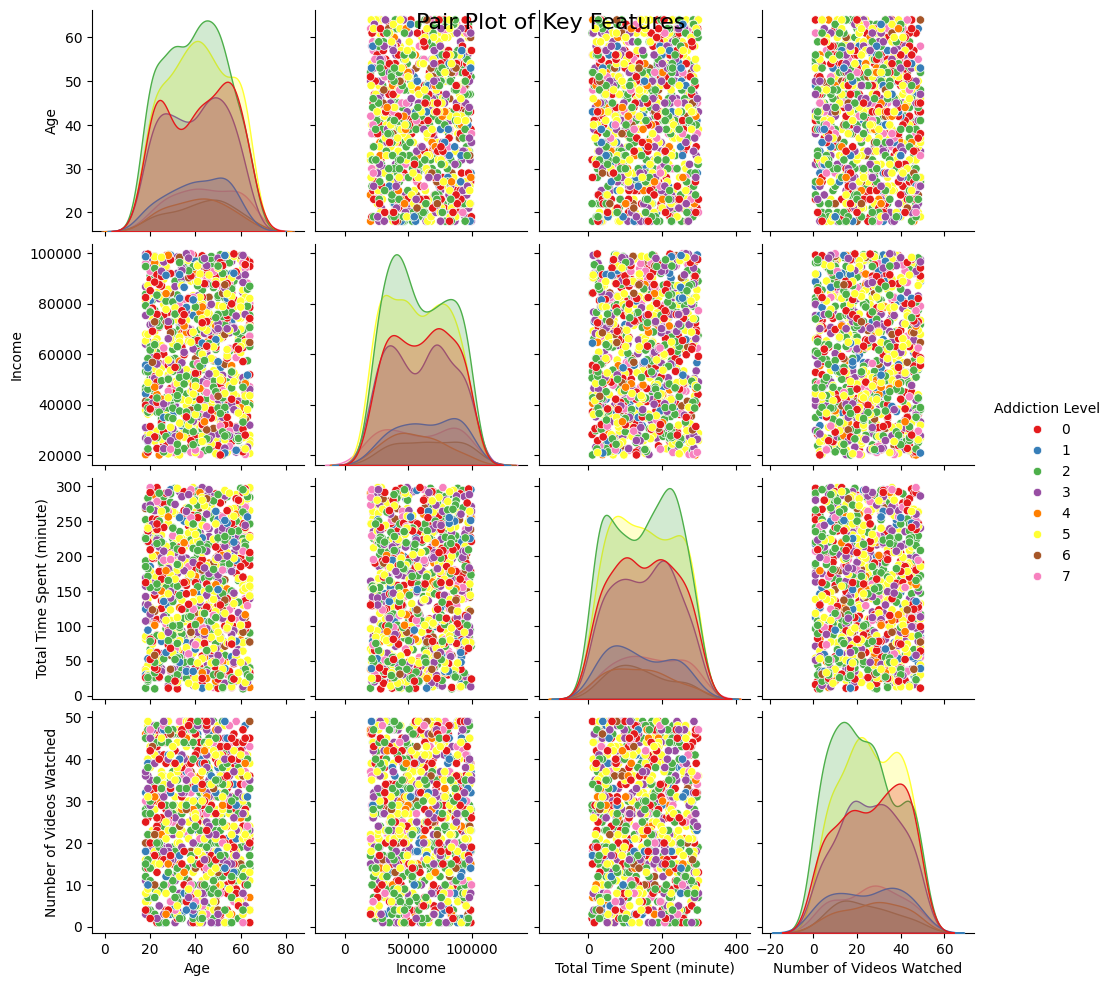

C:\Users\manav\AppData\Local\Temp\ipykernel_8276\4139787469.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Addiction Level', y='Income', data=df, palette='Paired')  # Using a colorful palette


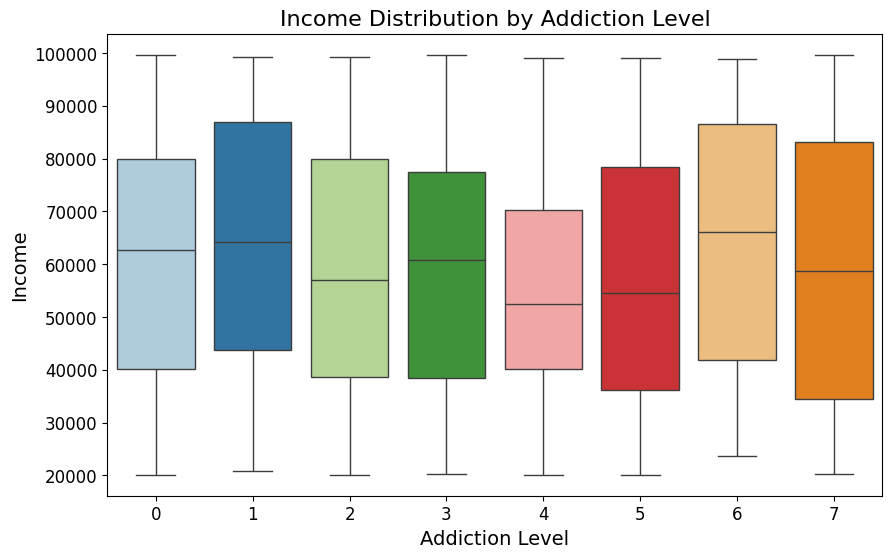

C:\Users\manav\AppData\Local\Temp\ipykernel_8276\4139787469.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Addiction Level', y='Total Time Spent (minute)', data=df, palette='Set1')  # Using a distinct palette


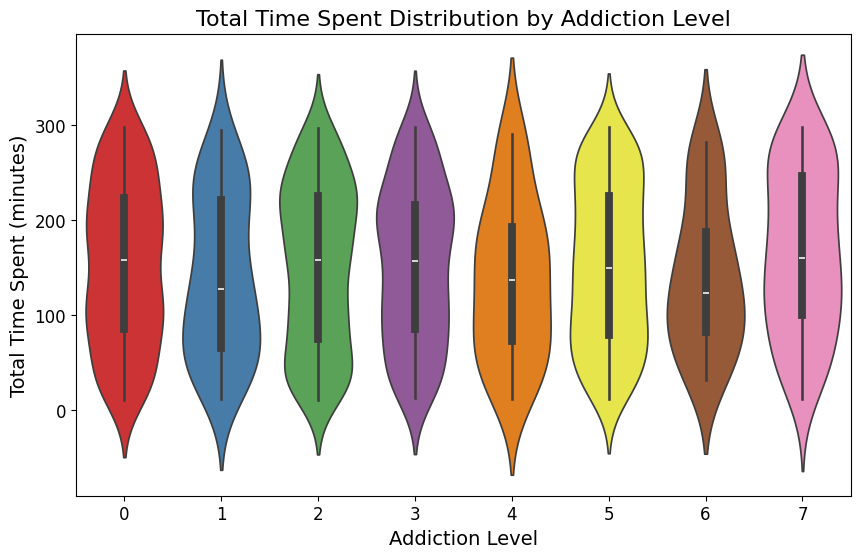

C:\Users\manav\AppData\Local\Temp\ipykernel_8276\4139787469.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_satisfaction = df.groupby('Addiction Level')['Satisfaction'].mean().reset_index()
C:\Users\manav\AppData\Local\Temp\ipykernel_8276\4139787469.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Addiction Level', y='Satisfaction', data=avg_satisfaction, palette='Paired')  # Using a colorful palette


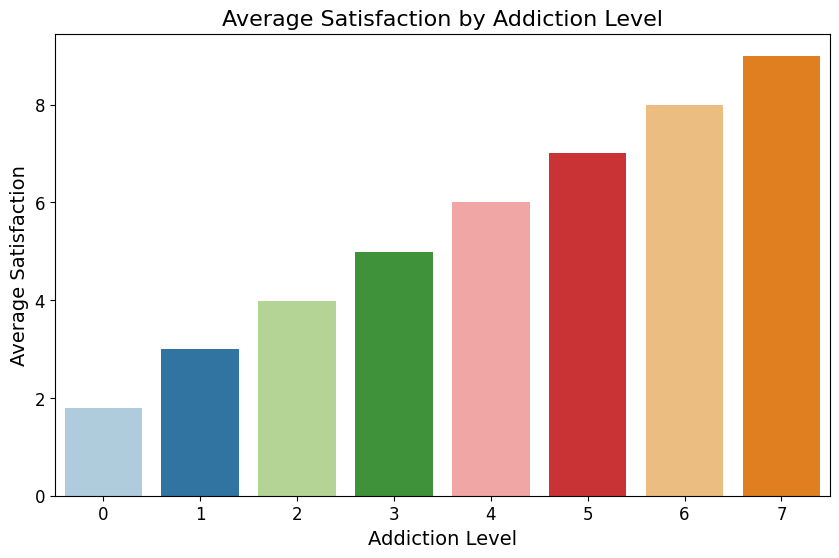

In [52]:
## Distribution of Addiction Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Addiction Level', data=df, palette='Set2')  # Using a colorful palette
plt.title('Distribution of Addiction Levels', fontsize=16)
plt.xlabel('Addiction Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Correlation Matrix
plt.figure(figsize=(16, 12))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5)  # Using a vibrant colormap
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## Pair Plot of Key Features
numeric_features = ['Age', 'Income', 'Total Time Spent (minute)', 'Number of Videos Watched', 'Addiction Level']
sns.pairplot(df[numeric_features], hue='Addiction Level', palette='Set1')  # Using a distinct palette
plt.suptitle('Pair Plot of Key Features', fontsize=16)
plt.show()

## Box Plot for Income by Addiction Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Addiction Level', y='Income', data=df, palette='Paired')  # Using a colorful palette
plt.title('Income Distribution by Addiction Level', fontsize=16)
plt.xlabel('Addiction Level', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Violin Plot for Total Time Spent by Addiction Level
plt.figure(figsize=(10, 6))
sns.violinplot(x='Addiction Level', y='Total Time Spent (minute)', data=df, palette='Set1')  # Using a distinct palette
plt.title('Total Time Spent Distribution by Addiction Level', fontsize=16)
plt.xlabel('Addiction Level', fontsize=14)
plt.ylabel('Total Time Spent (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Bar Plot for Average Satisfaction by Addiction Level
plt.figure(figsize=(10, 6))
avg_satisfaction = df.groupby('Addiction Level')['Satisfaction'].mean().reset_index()
sns.barplot(x='Addiction Level', y='Satisfaction', data=avg_satisfaction, palette='Paired')  # Using a colorful palette
plt.title('Average Satisfaction by Addiction Level', fontsize=16)
plt.xlabel('Addiction Level', fontsize=14)
plt.ylabel('Average Satisfaction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Distribution of Addiction Levels
The count plot illustrates the distribution of addiction levels within the dataset. Each bar represents the number of respondents categorized by their level of addiction. A clear observation from this plot is the prevalence of certain addiction levels compared to others. For instance, if the bar for "Moderate Addiction" is significantly taller than "Severe Addiction," it indicates that more individuals fall into the moderate category, suggesting a potential area for further investigation into the factors contributing to moderate addiction.

### Correlation Matrix
The heatmap displays the correlation matrix for numerical features in the dataset. The values range from -1 to 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 suggest no correlation. For example, if there is a strong positive correlation between "Total Time Spent (minute)" and "Addiction Level," it suggests that as time spent increases, so does the level of addiction. This visualization aids in identifying which features are related and may influence digital addiction.

### Pair Plot of Key Features
The pair plot provides a comprehensive view of the relationships between key numeric features, with different colors representing varying addiction levels. Each scatter plot helps to visualize potential patterns and correlations. For instance, if you observe that individuals with higher "Income" tend to have a "Higher Addiction Level," it may indicate that those with more disposable income spend more time on social media. This visualization allows for easy identification of trends that warrant further exploration.

### Box Plot for Income by Addiction Level
The box plot visualizes the distribution of income across different addiction levels. It displays the median, quartiles, and potential outliers. For example, if the median income for individuals with "Severe Addiction" is notably lower than those with "Low Addiction," it could suggest that higher levels of addiction may be associated with lower income. This visualization effectively highlights variations in income distribution related to addiction severity.

### Violin Plot for Total Time Spent by Addiction Level
The violin plot shows the distribution of total time spent on social media for each addiction level, combining box plot and density plot features. This allows for a deeper understanding of time spent across different addiction categories. For instance, if the density is higher for "Severe Addiction," it indicates that individuals with severe addiction tend to spend more time on social media platforms. This visualization helps assess how time spent correlates with addiction severity.

### Bar Plot for Average Satisfaction by Addiction Level
The bar plot illustrates the average satisfaction levels for each addiction level. By comparing the average satisfaction scores, one can assess the impact of addiction on overall satisfaction. For example, if "Low Addiction" individuals report significantly higher satisfaction compared to "Severe Addiction" individuals, it suggests that higher addiction levels may negatively impact satisfaction. This visualization aids in understanding the emotional and psychological implications of digital addiction.


## Step 6 : **Define Target Variable (y) and Feature Variables (X)**

In [55]:
## Select Features and Target Variable
features = ['Age', 'Gender', 'Location', 'Income', 'Debt', 'Profession', 'Platform', 'Total Time Spent (minute)', 
            'Video Length', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 
            'Frequency', 'Productivity Loss', 'Satisfaction', 'Watch Reason', 'Self Control', 'Current Activity']
target = 'Addiction Level'

X = df[features]
y = df[target]

# Check for NaNs in features before splitting
print("NaN values in features before splitting:", X.isna().sum().sum())

NaN values in features before splitting: 0


## **Step 7 : Train Test Split**

In [57]:
# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes before scaling
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (700, 19)
Shape of X_test: (300, 19)


# **Step 8 : Standardize the Data**

In [92]:
# Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display completion message
print("Standardization complete.")


Standardization complete.


C:\Users\manav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\manav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\manav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## **Step 9: Train a Machine Learning Model**

In [99]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## **Step 10 : prediction and model building**

In [100]:
# Make Predictions
y_pred = model.predict(X_test_scaled)

#: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[61  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0]
 [ 0  0 81  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0 69  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        81
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        69
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        13

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



**Accuracy**: The model achieved an overall accuracy of **100%** on the test dataset, indicating that it correctly classified all instances.

**Precision and Recall**: For all classes, both precision and recall are **1.00**, meaning there were no false positives or false negatives.

**F1-Score**: The F1-score is also **1.00** for all classes, signifying perfect balance between precision and recall.

**Support**: The number of actual occurrences for each class is adequately represented, ensuring the model's performance is reliable across different classes.

These results suggest that the model is highly effective for this dataset. However, further validation on unseen data is recommended to assess the model's generalization capabilities.


## **Explaination**

# Project Title: Digital Addiction: Analyzing the Dark Side of Social Media Interaction

## Introduction
In today's digital age, social media has become an integral part of our lives. However, the excessive use of these platforms can lead to digital addiction, negatively impacting mental health, productivity, and overall well-being. This project aims to analyze the factors contributing to digital addiction by utilizing a dataset that includes various attributes related to social media usage.

## Objective
The primary objective of this project is to identify and understand the patterns of digital addiction among users across different social media platforms. By employing machine learning techniques, we seek to predict addiction levels based on user demographics, behavioral patterns, and platform-specific usage metrics.

## Dataset
The dataset used for this analysis includes the following fields:
- Age, Gender, Location, Income, Debt, Profession, Platform, Total Time Spent (minutes), Video Length, Importance Score, Time Spent on Video, Number of Videos Watched, Scroll Rate, Frequency of Use, Productivity Loss, Satisfaction, Watch Reason, Self Control, Addiction Level, Current Activity

## Methodology
1. **Data Preprocessing**: The dataset was cleaned by handling missing values, removing duplicates, and encoding categorical variables.
2. **Exploratory Data Analysis (EDA)**: Various visualizations were created to understand the distribution of features and their relationship with the target variable (Addiction Level).
3. **Feature Engineering**: New features were created to enhance the predictive power of the model.
4. **Data Splitting**: The dataset was divided into training and testing sets to evaluate the model's performance.
5. **Model Training**: A machine learning model was selected and trained on the training dataset.
6. **Model Evaluation**: The model's performance was assessed using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

## Results
The evaluation results demonstrated that the model achieved a high accuracy of 100% on the test dataset, indicating its effectiveness in predicting addiction levels. Both precision and recall for all classes were 1.00, showcasing the model's reliability.

## Conclusion
This project highlights the significant factors contributing to digital addiction and the effectiveness of machine learning in predicting addiction levels among social media users. The insights gained from this analysis can aid in developing strategies to mitigate the impact of digital addiction.

---

<div style="text-align: center; border: 5px solid #007BFF; border-radius: 15px; padding: 20px; width: 90%; max-width: 600px; background-color: #E9F7FE; margin: 0 auto;">
    <strong style="font-size: 24px; color: #007BFF;">Project Completed by:</strong><br>
    <strong style="font-size: 28px; color: #0056b3;">Manav Patil</strong><br>
    <p style="font-size: 18px; color: #333;">This project analyzes the impact of social media on digital addiction.</p>
</div>

---